In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing

sns.set(color_codes=True)

In [2]:
df = pd.read_csv('dataset/merged_data_pre-processed.csv')
df.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   M_Poverty          3134 non-null   int64  
 2   F_Poverty          3134 non-null   int64  
 3   FIPS               3134 non-null   int64  
 4   Med_Income         3134 non-null   float64
 5   Med_Income_White   3134 non-null   float64
 6   Med_Income_Black   3134 non-null   float64
 7   Med_Income_Nat_Am  3134 non-null   float64
 8   Med_Income_Asian   3134 non-null   float64
 9   Hispanic           3134 non-null   float64
 10  M_With             3134 non-null   int64  
 11  M_Without          3134 non-null   int64  
 12  F_With             3134 non-null   int64  
 13  F_Without          3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   float64
 15  Avg_Ann_Incidence  3134 non-null   float64
 16  recent_trend       3134 

In [4]:
categorical_features = ['State', 'recent_trend']
numerical_features = ['M_Poverty', 'F_Poverty', 'FIPS','Med_Income', 'Med_Income_White',
                      'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
                      'Hispanic', 'M_With', 'M_Without', 'Incidence_Rate', 'Avg_Ann_Incidence',
                     'Mortality_Rate', 'Avg_Ann_Deaths']

Correlation matrix is : 


<AxesSubplot:>

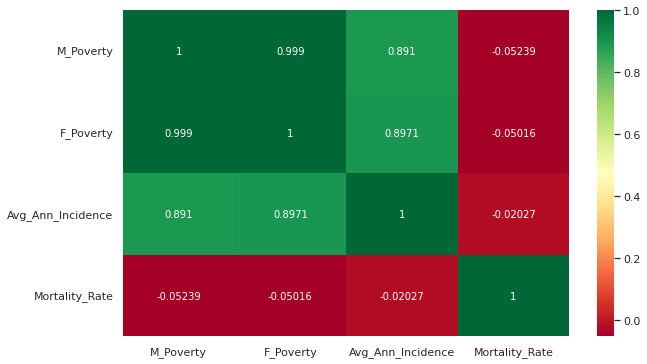

In [5]:
plt.figure(figsize=(10,6))
matrix = df[['M_Poverty', 'F_Poverty', 
            'Avg_Ann_Incidence','Mortality_Rate']].corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

Correlation matrix is : 


<AxesSubplot:>

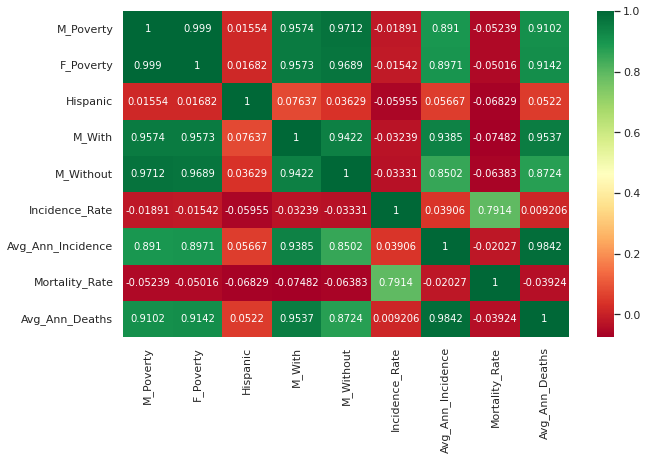

In [6]:
plt.figure(figsize=(10,6))
matrix = df[['M_Poverty', 'F_Poverty', 'Hispanic', 'M_With', 'M_Without', 'Incidence_Rate',
            'Avg_Ann_Incidence','Mortality_Rate', 'Avg_Ann_Deaths']].corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

# NOTE !!

We can see that the **Incidence Rate and Mortality Rates and Hispanic** are useless, they not have any correlation with Poverty or **Avg_Ann_Incidence and Avg_Ann_Deaths**.

So lets ignore these two variables for now and display the correlation without them.

array([[<AxesSubplot:title={'center':'M_Poverty'}>,
        <AxesSubplot:title={'center':'F_Poverty'}>],
       [<AxesSubplot:title={'center':'M_With'}>,
        <AxesSubplot:title={'center':'M_Without'}>],
       [<AxesSubplot:title={'center':'Avg_Ann_Incidence'}>,
        <AxesSubplot:title={'center':'Avg_Ann_Deaths'}>]], dtype=object)

<Figure size 720x432 with 0 Axes>

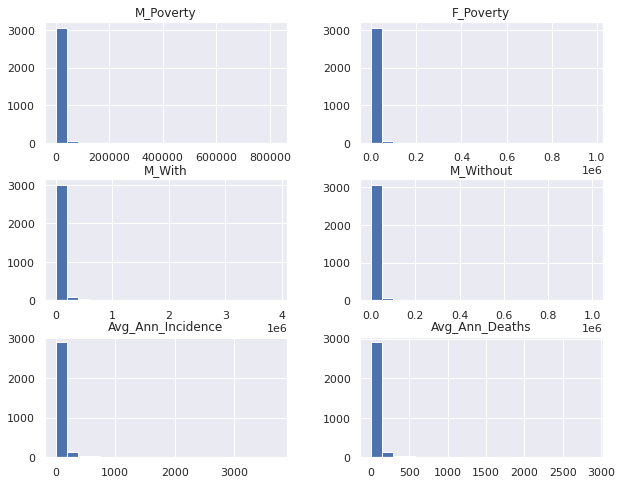

In [7]:
plt.figure(figsize=(10,6))
df[['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].hist(bins=20, figsize=(10,8))

# Note !

We can see that the data very skewed to the right, so it will be more powerful to get the data in normal distribution shape.

In [8]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
log_scale = pt.fit_transform(df[['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']])

In [9]:
log_scale = pd.DataFrame(log_scale, columns=['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths'])

array([[<AxesSubplot:title={'center':'M_Poverty'}>,
        <AxesSubplot:title={'center':'F_Poverty'}>],
       [<AxesSubplot:title={'center':'M_With'}>,
        <AxesSubplot:title={'center':'M_Without'}>],
       [<AxesSubplot:title={'center':'Avg_Ann_Incidence'}>,
        <AxesSubplot:title={'center':'Avg_Ann_Deaths'}>]], dtype=object)

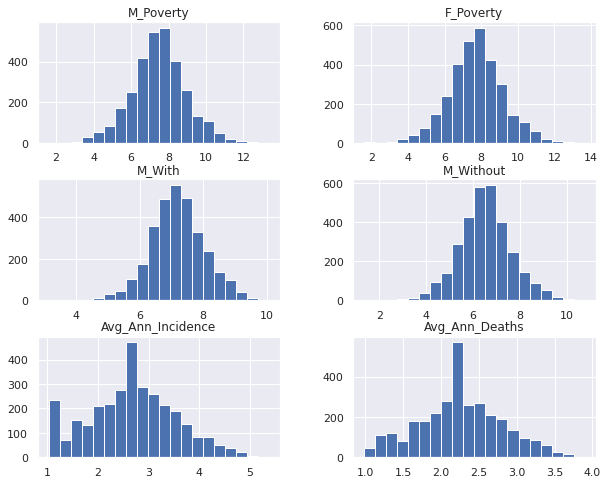

In [10]:
log_scale.hist(bins=20, figsize=(10,8))

In [11]:
log_scale.head()

,M_Poverty,F_Poverty,M_With,M_Without,Avg_Ann_Incidence,Avg_Ann_Deaths
0,5.766244,5.368211,5.599848,6.292671,1.033895,2.257616
1,5.567629,5.399430,6.278214,5.878096,1.033895,2.257616
2,9.163722,9.424631,8.488215,8.368044,3.759435,2.951143
3,7.617149,7.637853,6.865869,6.835111,1.623884,1.368471
4,3.480220,3.574287,5.091711,4.407670,1.033895,2.257616


Correlation matrix is : 


<AxesSubplot:>

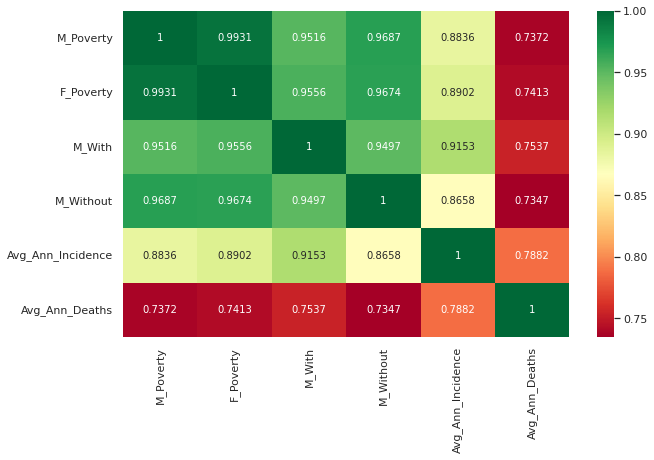

In [12]:
plt.figure(figsize=(10,6))
matrix = log_scale.corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

# Note !

Let's check other features with both  Avg_Ann_Deaths and Avg_Ann_Incidence.

In [13]:
plt.figure(figsize=(10,6))
matrix = df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].corr()

matrix['Avg_Ann_Deaths'].sort_values(ascending=False)

Avg_Ann_Deaths       1.000000
Avg_Ann_Incidence    0.984177
Med_Income_White     0.270097
Med_Income           0.225049
Med_Income_Black     0.128901
Med_Income_Asian     0.083761
Med_Income_Nat_Am    0.033750
Name: Avg_Ann_Deaths, dtype: float64

<Figure size 720x432 with 0 Axes>

array([[<AxesSubplot:title={'center':'Med_Income'}>,
        <AxesSubplot:title={'center':'Med_Income_White'}>,
        <AxesSubplot:title={'center':'Med_Income_Black'}>],
       [<AxesSubplot:title={'center':'Med_Income_Nat_Am'}>,
        <AxesSubplot:title={'center':'Med_Income_Asian'}>,
        <AxesSubplot:title={'center':'Avg_Ann_Incidence'}>],
       [<AxesSubplot:title={'center':'Avg_Ann_Deaths'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 720x432 with 0 Axes>

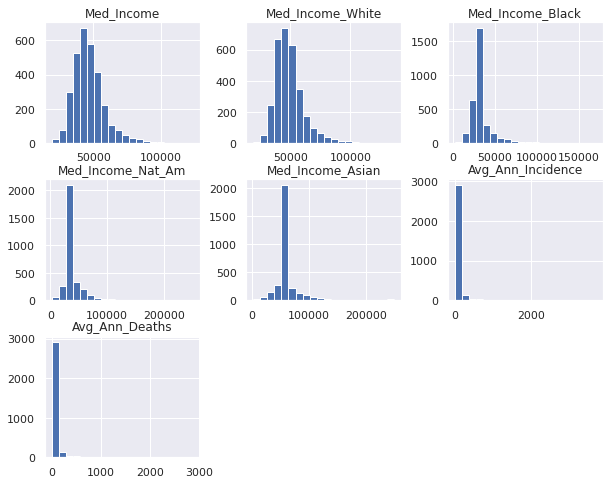

In [14]:
plt.figure(figsize=(10,6))
df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].hist(bins=20, figsize=(10,8))

# Note !

Lets apply scaling again and check the data.

array([[<AxesSubplot:title={'center':'Med_Income'}>,
        <AxesSubplot:title={'center':'Med_Income_White'}>,
        <AxesSubplot:title={'center':'Med_Income_Black'}>],
       [<AxesSubplot:title={'center':'Med_Income_Nat_Am'}>,
        <AxesSubplot:title={'center':'Med_Income_Asian'}>,
        <AxesSubplot:title={'center':'Avg_Ann_Incidence'}>],
       [<AxesSubplot:title={'center':'Avg_Ann_Deaths'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

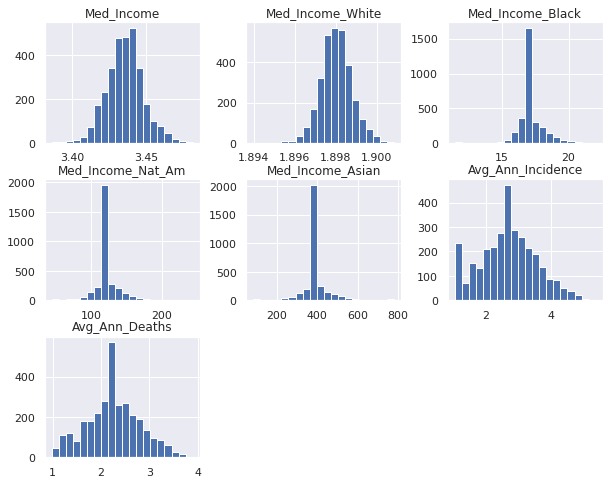

In [15]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
log_scale = pt.fit_transform(df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']])


log_scale = pd.DataFrame(log_scale, columns=['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths'])

log_scale.hist(bins=20, figsize=(10,8))

In [16]:
matrix = log_scale.corr()

matrix['Avg_Ann_Deaths'].sort_values(ascending=False)

Avg_Ann_Deaths       1.000000
Avg_Ann_Incidence    0.788248
Med_Income_White     0.285187
Med_Income           0.271605
Med_Income_Black     0.198643
Med_Income_Asian     0.080953
Med_Income_Nat_Am    0.070006
Name: Avg_Ann_Deaths, dtype: float64

## Note !

From Exploratory above we can conclude that some of the features have a strong positive correlation with Avg_Ann_Deaths like [Avg_Ann_Incidence, 'M_Poverty', 'F_Poverty', 'M_With', 'M_Without',] while others have less positive like [Med_Income_White, Med_Income, Med_Income_Black], but as well we are not going to ignore other features as all we will try to see how the model with work with and without these less correlated features.

But first of all let make the scaling for all numerical features.

array([[<AxesSubplot:title={'center':'M_Poverty'}>,
        <AxesSubplot:title={'center':'F_Poverty'}>,
        <AxesSubplot:title={'center':'FIPS'}>,
        <AxesSubplot:title={'center':'Med_Income'}>],
       [<AxesSubplot:title={'center':'Med_Income_White'}>,
        <AxesSubplot:title={'center':'Med_Income_Black'}>,
        <AxesSubplot:title={'center':'Med_Income_Nat_Am'}>,
        <AxesSubplot:title={'center':'Med_Income_Asian'}>],
       [<AxesSubplot:title={'center':'Hispanic'}>,
        <AxesSubplot:title={'center':'M_With'}>,
        <AxesSubplot:title={'center':'M_Without'}>,
        <AxesSubplot:title={'center':'Incidence_Rate'}>],
       [<AxesSubplot:title={'center':'Avg_Ann_Incidence'}>,
        <AxesSubplot:title={'center':'Mortality_Rate'}>,
        <AxesSubplot:title={'center':'Avg_Ann_Deaths'}>, <AxesSubplot:>]],
      dtype=object)

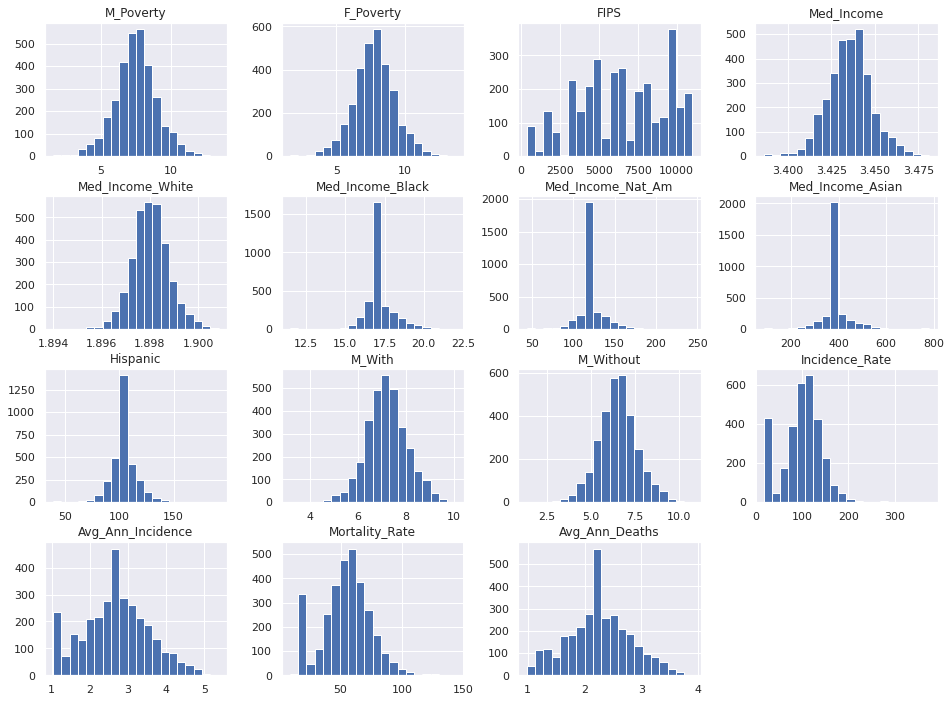

In [17]:

pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)


log_scale = pt.fit_transform(df[numerical_features])

df[numerical_features] = pd.DataFrame(log_scale, columns=numerical_features)


df[numerical_features].hist(bins=20, figsize=(16,12))

In [18]:
df.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,5.766244,5.368211,684.085786,3.451072,1.899342,17.285424,139.776732,402.796797,114.666736,5.599848,6.292671,566,540,19.803971,1.033895,stable,16.123403,2.257616
1,AK,5.567629,5.399430,684.938033,3.465468,1.900102,20.277411,133.923171,456.077918,132.432609,6.278214,5.878096,1707,564,19.803971,1.033895,stable,16.123403,2.257616
2,AK,9.163722,9.424631,686.074037,3.462218,1.899831,18.557351,139.006510,406.099435,116.720717,8.488215,8.368044,122426,21393,95.073464,3.759435,stable,51.604112,2.951143
3,AK,7.617149,7.637853,694.582263,3.441905,1.899982,19.594522,126.304609,528.643550,170.332753,6.865869,6.835111,6627,1774,97.210195,1.623884,stable,64.329065,1.368471
4,AK,3.480220,3.574287,697.413750,3.463020,1.899853,17.179963,147.476683,395.731047,89.962742,5.091711,4.407670,349,67,19.803971,1.033895,stable,16.123403,2.257616


In [19]:
# Lets save the data after scaling 
df.to_csv('dataset/merged_data_scaled.csv', index=False)